In [2]:
import datetime as dt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
import pandas as pd

In [3]:
# Fetch stock data using yfinance
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
stk_data = yf.download('AXISBANK.NS', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [4]:
# Extract the columns we're interested in
data = stk_data[['Open', 'High', 'Low', 'Close']]


In [5]:
# VARMAX Model
model_varmax = sm.tsa.VARMAX(data, order=(1,1))
results_varmax = model_varmax.fit(disp=False)
print("VARMAX Model Summary:")
print(results_varmax.summary())

/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


VARMAX Model Summary:
                                  Statespace Model Results                                  
Dep. Variable:     ['Open', 'High', 'Low', 'Close']   No. Observations:                  150
Model:                                   VARMA(1,1)   Log Likelihood               -1851.834
                                        + intercept   AIC                           3795.667
Date:                              Mon, 08 Jul 2024   BIC                           3934.157
Time:                                      19:33:26   HQIC                          3851.931
Sample:                                           0                                         
                                              - 150                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     0.07, 0.10, 0.91, 0.30   Jarque-Bera (JB):   23.89, 167.79, 309.57, 2.96
Prob(Q):                0.79, 0.75, 0.34, 0.

/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
# Simple Exponential Smoothing (SES) for Close prices
ses_model = SimpleExpSmoothing(data['Close'])
ses_fit = ses_model.fit()
print("\nSimple Exponential Smoothing Model Summary:")
print(ses_fit.summary())


Simple Exponential Smoothing Model Summary:
                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Close   No. Observations:                  150
Model:             SimpleExpSmoothing   SSE                          18437.988
Optimized:                       True   AIC                            725.730
Trend:                           None   BIC                            731.751
Seasonal:                        None   AICC                           726.006
Seasonal Periods:                None   Date:                 Mon, 08 Jul 2024
Box-Cox:                        False   Time:                         19:33:26
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial

/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
# Holt-Winters Exponential Smoothing (HWES) for Close prices
hwes_model = ExponentialSmoothing(data['Close'], trend='add', seasonal='add', seasonal_periods=12)
hwes_fit = hwes_model.fit()
print("\nHolt-Winters Exponential Smoothing Model Summary:")
print(hwes_fit.summary())


Holt-Winters Exponential Smoothing Model Summary:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  150
Model:             ExponentialSmoothing   SSE                          17137.915
Optimized:                         True   AIC                            742.762
Trend:                         Additive   BIC                            790.932
Seasonal:                      Additive   AICC                           747.983
Seasonal Periods:                    12   Date:                 Mon, 08 Jul 2024
Box-Cox:                          False   Time:                         19:33:26
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9999399                a

/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
# Plotting the results
import matplotlib.pyplot as plt


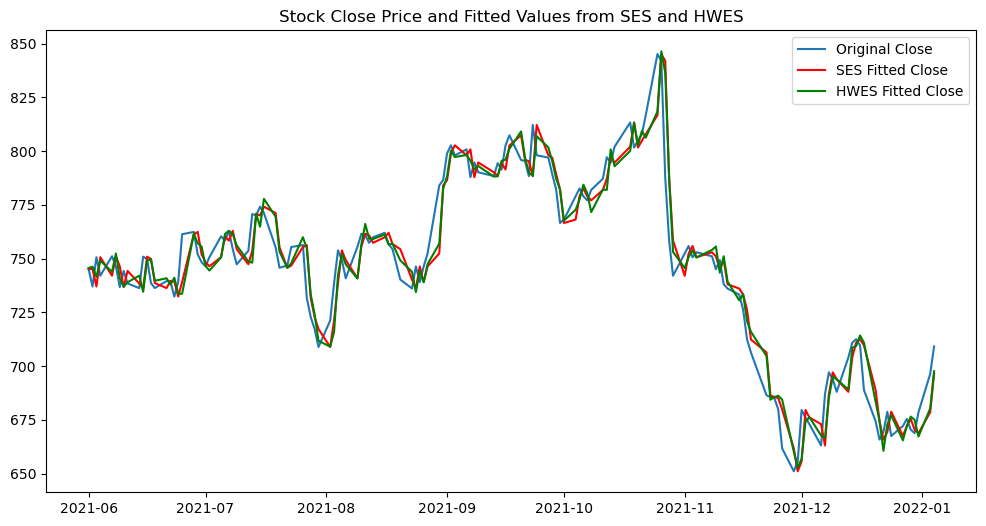

In [9]:
# Plotting the original Close prices and fitted values from SES and HWES
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original Close')
plt.plot(ses_fit.fittedvalues, label='SES Fitted Close', color='red')
plt.plot(hwes_fit.fittedvalues, label='HWES Fitted Close', color='green')
plt.legend()
plt.title('Stock Close Price and Fitted Values from SES and HWES')
plt.show()


In [10]:
# Forecasting
forecast_varmax = results_varmax.get_forecast(steps=10).predicted_mean
forecast_ses = ses_fit.forecast(10)
forecast_hwes = hwes_fit.forecast(10)

/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/vidhya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get

In [11]:
# Save forecast data to CSV
forecast_varmax_df = pd.DataFrame(forecast_varmax, columns=["Open", "High", "Low", "Close"])
forecast_ses_df = pd.DataFrame(forecast_ses, columns=["Close"])
forecast_hwes_df = pd.DataFrame(forecast_hwes, columns=["Close"])


In [12]:
forecast_varmax_df.to_csv("VARMAX_Forecast.csv", index=False)
forecast_ses_df.to_csv("SES_Forecast.csv", index=False)
forecast_hwes_df.to_csv("HWES_Forecast.csv", index=False)

In [13]:
print("\nVARMAX Forecast saved to VARMAX_Forecast.csv")


VARMAX Forecast saved to VARMAX_Forecast.csv


In [14]:
print("\nSES Forecast saved to SES_Forecast.csv")


SES Forecast saved to SES_Forecast.csv


In [15]:
print("\nHWES Forecast saved to HWES_Forecast.csv")


HWES Forecast saved to HWES_Forecast.csv
